<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Flavio Palacios y
    Aranzazú Rendón.

**Fecha:** 15 de Febrero del 2021.

**Expediente** : if729825, if722272.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 4: Clase 08

### Link de Github
[Github](https://github.com/Palacios-F/ProyectoConjunto_FCPalacios_ARendon)

### Enunciado
Como ejemplo simple de una simulación de Monte Carlo, considere calcular la probabilidad de una suma particular del lanzamiento de tres dados (cada dado tiene valores del uno al seis). Además cada dado tiene las siguientes carácterísticas: el primer dado no está cargado (distribución uniforme todos son equiprobables); el segundo y tercer dado están cargados basados en una distribución binomial con parámetros (`n=5, p=0.5` y `n=5, p=0.2`). Calcule la probabilidad de que la suma resultante sea 7, 14 o 18. 

### Solución Flavio Palacios

Tomando en consideración los siguientes puntos de probabilidad para el desarrollo de la propuesta:
La probabilidad de un suceso A es igual a la cantidad de resultados de ese suceso dividido entre el total de sucesos.
$$P(A)= \frac{\text{sucesos favorables}}{\text{total de sucesos}}$$
Y que la probabilidad de la unión de dos sucesos a y b es:
$$P(a \cup b) = P(a) + P(b) - P(a \cap b)$$ 
y como en nuestro caso particular no hay posibilidad de que pueda ser uno u otro se puede simplificar.
$$P(a \cup b) = P(a) + P(b)$$
y ya generalizando para una mayor cantidad de sucesos
$$\bigcup_{i=1}^{n} s_i = s_1 \cup s_2 \cup s_3 \cup ... s_n$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.stats as st

In [3]:
def dados(n:"Número de simulaciones", lista:'Lista con la suma de los dados'):
    '''
    Función para simular el lanzamiento de tres dados un conjunto de valores de posibles sumas a calcular
    utilizando 3 dados con distribuciones de probabilidad distintas: una uniforme y dos con distrbuciones binomial
    y parametros n=5, p=0.5 y n=5, p=0.2
    '''
    # lanzamiento de dados con las distribuciones caracteristicas
    d1 = np.random.randint(1,7,n)
    d2 = st.binom(n=5,p=0.5).rvs(size = n)
    d3 = st.binom(n=5,p=0.2).rvs(size = n)
    # Suma de lanzar los 3 dados
    suma = d1+d2+d3
    #Calculo de los resultados favorables de las posibles sumas
    favorables = sum([(suma == i).sum() for i in lista])
    salida = favorables / n
    return salida

In [4]:
answ = dados(1000000, [7,14,18])
answ

0.162131

### Histograma de la suma de los dados

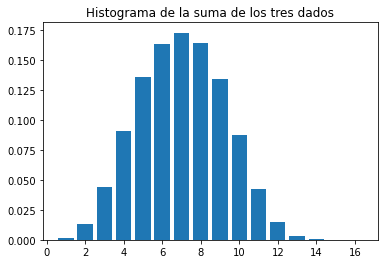

In [6]:
n = 10000000
d1 = np.random.randint(1,7,n)
d2 = st.binom(n=5,p=0.5).rvs(size = n)
d3 = st.binom(n=5,p=0.2).rvs(size = n)
suma = d1+d2+d3
maximo = suma.max()
y,x = np.histogram(suma, bins = maximo, density = True)
plt.bar(range(1, maximo+1),y)
plt.title('Histograma de la suma de los tres dados');

### Histogramas de las funciones de probabilidad de cada uno de los dados

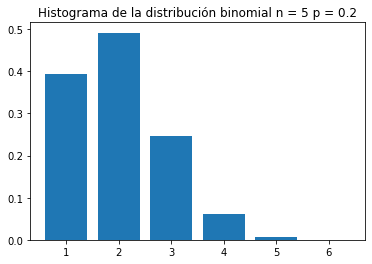

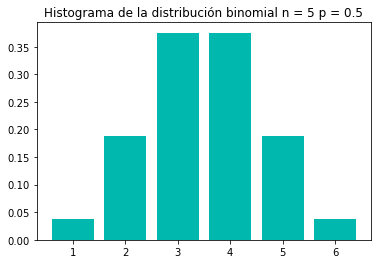

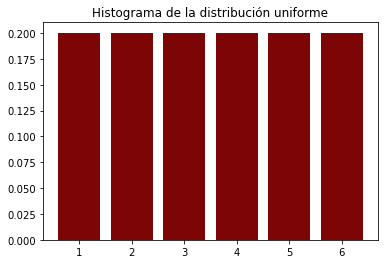

In [7]:
y1,x = np.histogram(d1, bins = 6, density = True)
y2,x = np.histogram(d2, bins = 6, density = True)
y3,x = np.histogram(d3, bins = 6, density = True)

plt.bar(range(1,7),y3)
plt.title('Histograma de la distribución binomial n = 5 p = 0.2')
plt.show()
plt.bar(range(1,7),y2, color = '#00b8ae')
plt.title('Histograma de la distribución binomial n = 5 p = 0.5')
plt.show()
plt.bar(range(1,7),y1, color = '#7e0505')
plt.title('Histograma de la distribución uniforme');

#### Comentarios sobre la solución

### Solución Aranzazú Rendón

#### Comentarios sobre la solución

# 2 Ejercicio de aplicación- Cafetería Central

Premisas para la simulación:
- Negocio de alimentos que vende bebidas y alimentos.
- Negocio dentro del ITESO.
- Negocio en cafetería central.
- Tipo de clientes (hombres y mujeres).
- Rentabilidad del 60%.

## Objetivo
Realizar una simulación estimado el tiempo medio que se tardaran los clientes en ser atendidos entre el horario de 6:30 a 1 pm. Además saber el consumo. 
**Analizar supuestos y limitantes**

## Supuestos en simulación
Clasificación de clientes: 
- Mujer  = 1 $\longrightarrow$ aleatorio < 0.5
- Hombre = 0 $\longrightarrow$ aleatorio $\geq$ 0.5.

Condiciones iniciales:
- Todas las distrubuciones de probabilidad se supondrán uniformes.
- Tiempo de simulación: 6:30 am - 1:30pm $\longrightarrow$ T = 7 horas = 25200 seg.
- Tiempo de llegada hasta ser atendido: Min=5seg, Max=30seg.
- Tiempo que tardan los clientes en ser atendidos:
    - Mujer: Min = 1 min= 60seg, Max = 5 min = 300 seg
    - Hombre: Min = 40 seg, Max = 2 min= 120 seg
- Consumo según el tipo de cliente:
    - Mujer: Min = 30 pesos, Max = 100 pesos
    - Hombre: Min = 20 pesos, Max = 80 pesos

Responder las siguientes preguntas basados en los datos del problema:
1. ¿Cuáles fueron los gastos de los hombres y las mujeres en 5 días de trabajo?.
2. ¿Cuál fue el consumo promedio de los hombres y mujeres?
3. ¿Cuál fue el número de personas atendidas por día?
4. ¿Cuál fue el tiempo de atención promedio?
5. ¿Cuánto fue la ganancia promedio de la cafetería en 5 días de trabajo y su respectiva rentabilidad?

### Solución Flavio Palacios

In [8]:
################## Datos del problema
d = 5
T =25200
T_at_min = 5; T_at_max = 30
T_mujer_min =60; T_mujer_max = 300
T_hombre_min = 40; T_hombre_max = 120
C_mujer_min = 30; C_mujer_max = 100
C_hombre_min = 20; C_hombre_max = 80

In [17]:
######## Funciones auxiliares que generan las distribuciones uniformes de acuerdo a las caracteristicas
thom = lambda: np.random.randint(T_hombre_min,T_hombre_max+1)
tmuj = lambda: np.random.randint(T_mujer_min,T_mujer_max+1)
chom = lambda: np.random.randint(C_hombre_min,C_hombre_max+1)
cmuj = lambda: np.random.randint(C_mujer_min,C_mujer_max+1)
genero = lambda : 1 if np.random.rand() >=0.5 else 0

#### funcion para rellenar vectores
def fill_vect(x,i,f):
        x[i] = f()

In [18]:
########## Función para simular un día de operación
def dia():
    '''
    Función para simular un día de operaciones 
    '''
    
    vector_gen = np.zeros(200, dtype = int)
    vector_tiem = np.zeros(200, dtype = int)
    
    # rellenar el vector de genero
    [fill_vect(vector_gen,i,genero) for i in range(200)]
    # rellenar el vector de tiempo
    [fill_vect(vector_tiem,i,thom) if vector_gen[i] == 1 else fill_vect(vector_tiem,i,tmuj) for i in range(200)]
    
    # Utilización de un vector adicional de tiempo para aumentar el tiempo de llegada  y definir los clientes atendidos
    v_tiem_aux = vector_tiem + np.random.randint(T_at_min,T_at_max+1,200)
    v_tiem_aux = v_tiem_aux.cumsum()
    v_tiem_aux = v_tiem_aux[v_tiem_aux <= T]
    
    # recorte de los vectores para ajustarlo al máximo número de clientes que se pueden atender
    clientes = len(v_tiem_aux )
    vector_gen = vector_gen[:clientes]
    vector_tiem = vector_tiem[:clientes]
    vector_gast = np.zeros(clientes, dtype = int)
    
    # rellenar el vector de consumo
    [fill_vect(vector_gast,i,chom) if vector_gen[i] == 1 else fill_vect(vector_gast,i,cmuj) for i in range(clientes)]
    
    # calculos para la lista de salida
    hombres = vector_gen.sum()
    mujeres = clientes - hombres
    consumo_t = vector_gast.sum()
    consumo_h = np.dot(vector_gen,vector_gast)
    consumo_m = consumo_t - consumo_h
    tiempo_t = vector_tiem.sum()
    
    return (clientes, mujeres, hombres, consumo_h,consumo_m,tiempo_t)

# Función para simular el tiempo de operación de la cafetería
def cafeteria(n:'Número de días'):
    return [dia() for i in range(n)]

simulacion = cafeteria(d)

In [19]:
mujeres = sum(list(map(lambda a: a[4],simulacion)))
hombres = sum(list(map(lambda a: a[3],simulacion)))
print('El gasto total de los hombres en los 5 días de simulación fue de ', hombres, ' y el de las mujeres fue de ', mujeres)

El gasto total de los hombres en los 5 días de simulación fue de  20156  y el de las mujeres fue de  26864


In [20]:
nmujeres = sum(list(map(lambda a: a[1],simulacion)))
nhombres = sum(list(map(lambda a: a[2],simulacion)))
pmujeres = mujeres/nmujeres
phombres = hombres/nhombres
print('El gasto promedio de los hombres en los 5 días de simulación fue de ', phombres,
      ' y el de las mujeres fue de ', pmujeres)

El gasto promedio de los hombres en los 5 días de simulación fue de  50.64321608040201  y el de las mujeres fue de  63.96190476190476


In [21]:
dia = list(map(lambda a: a[0],simulacion))
pdia = sum(dia)/d
print('El promedio de clientes que se atendio fue de ',pdia)
[print('Se atendieron ', dia[i], 'personas el día', i+1) for i in range(d)];

El promedio de clientes que se atendio fue de  163.6
Se atendieron  158 personas el día 1
Se atendieron  169 personas el día 2
Se atendieron  157 personas el día 3
Se atendieron  174 personas el día 4
Se atendieron  160 personas el día 5


In [22]:
tiempo = sum(list(map(lambda a: a[5],simulacion)))
tpromedio = tiempo / sum(dia)
print('El tiempo promedio de la atencion fue de ', tpromedio , ' segundos')

El tiempo promedio de la atencion fue de  136.11735941320293  segundos


In [23]:
total = mujeres + hombres
ganancias = total*0.6
print('Los ingresos totales fueron de ', total, 'y las ganancias fueron de ', ganancias)

Los ingresos totales fueron de  47020 y las ganancias fueron de  28212.0


1. ¿Cuáles fueron los gastos de los hombres y las mujeres en 5 días de trabajo?.  
   Hombres 20156 y Mujeres 26864  
   
   
     
2. ¿Cuál fue el consumo promedio de los hombres y mujeres?  
   Hombres 50.64 y Mujeres 63.96 
   
     
3. ¿Cuál fue el número de personas atendidas por día?  
   El promedio fue de 163.6 personas por día  
   
     
4. ¿Cuál fue el tiempo de atención promedio?  
   Fue de 136.12 segundos  
   
     
5. ¿Cuánto fue la ganancia promedio de la cafetería en 5 días de trabajo y su respectiva rentabilidad?  
   Fue de 28212 pesos

### Solución Aranzazú Rendón